<a href="https://colab.research.google.com/github/gurralamanoj/Data-Science-For-Beginners/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Practice

What we are doing here.

*   Loading the Data
*   Visualize the Images
*   Separate the labels and Pixels
*   Divide the train and test data
*   Implement the model using SKlearn
*   Implement the model using Keras
*   Conclusion
*   List item


##About Dataset

###Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

###Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


###Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


###TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

###Acknowledgements

Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

###License

The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

  




In [2]:
#! pip install kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json  
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d zalando-research/fashionmnist
! unzip '/content/fashionmnist.zip'

 89% 61.0M/68.8M [00:00<00:00, 183MB/s]
100% 68.8M/68.8M [00:00<00:00, 165MB/s]
Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


In [12]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [26]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


(28, 28)


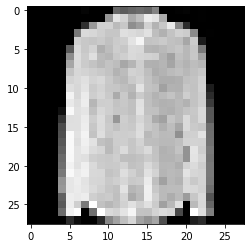

In [21]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1,785)]
rows_to_examine = 2
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
print(image_data.shape)
plt.imshow(image_data,cmap="gray")



(28, 28)


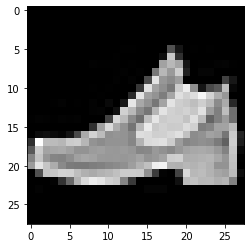

In [22]:
rows_to_examine = 1
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
print(image_data.shape)
plt.imshow(image_data,cmap="gray")

In [23]:
x = train.iloc[:,1:]
y = train['label']
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 184)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(48000, 784)
(12000, 784)
(48000,)
(12000,)


## Implementation using sklearn (MLPClassifier)

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), activation="relu", max_iter=200, verbose=True)

In [31]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.90240636
Iteration 2, loss = 2.30849893
Iteration 3, loss = 2.29875388
Iteration 4, loss = 2.08635543
Iteration 5, loss = 1.71075072
Iteration 6, loss = 1.50786654
Iteration 7, loss = 1.35542779
Iteration 8, loss = 1.23046535
Iteration 9, loss = 1.07035526
Iteration 10, loss = 1.02740200
Iteration 11, loss = 0.87620577
Iteration 12, loss = 0.83161584
Iteration 13, loss = 0.79304123
Iteration 14, loss = 0.77352915
Iteration 15, loss = 0.74734775
Iteration 16, loss = 0.72584650
Iteration 17, loss = 0.70159178
Iteration 18, loss = 0.70015412
Iteration 19, loss = 0.68412704
Iteration 20, loss = 0.67776077
Iteration 21, loss = 0.67039475
Iteration 22, loss = 0.66716914
Iteration 23, loss = 0.67091276
Iteration 24, loss = 0.65801895
Iteration 25, loss = 0.66185855
Iteration 26, loss = 0.64663842
Iteration 27, loss = 0.65238597
Iteration 28, loss = 0.64932489
Iteration 29, loss = 0.64120601
Iteration 30, loss = 0.64432471
Iteration 31, loss = 0.63778749
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=True)

In [46]:
mlp.coefs_

[array([[ 2.02643004e-001, -2.51935362e-315,  4.75957459e-315, ...,
          1.08046097e-315,  1.84751064e-315,  4.24522783e-315],
        [ 3.30125687e-001, -4.47163100e-315,  1.83149537e-001, ...,
         -6.15939447e-316, -1.92868944e-315,  2.28676293e-001],
        [-1.19614284e+000, -2.62393259e-315,  1.93194442e-001, ...,
         -1.66835926e-315,  2.34491543e-315,  2.28695462e-001],
        ...,
        [ 1.55483092e-001,  1.28629472e-138,  1.79735216e-002, ...,
         -1.01189595e-280,  1.35977164e-162, -6.68567379e-002],
        [ 2.54867327e-001,  1.46205218e-157, -7.26902324e-001, ...,
         -7.92059878e-316,  6.33285655e-228, -3.16384142e-001],
        [ 2.72993827e-001,  4.22654535e-315,  3.35052550e-001, ...,
         -4.34574584e-315, -2.92236707e-316,  1.09788680e-002]]),
 array([[-8.48609297e-002, -1.18080230e-001,  2.30807212e-002,
          1.04969293e-001,  1.03522584e-001,  1.90185592e-001,
         -9.58742557e-002,  1.26950343e-001, -5.79368968e-003,
    

In [47]:
mlp.intercepts_

[array([-0.01162505, -0.11143355,  2.77860702,  0.0124218 , -0.11953837,
         1.22917308, -0.11072429, -0.02026473,  1.3261541 , -0.07826605,
        -0.09653022, -0.10417022, -0.06209244, -0.04412798, -0.03720892,
         2.93167286]),
 array([ 1.37449381e+00, -7.83618435e-04, -1.36532529e+00, -6.80664737e-01,
        -1.95536267e+00, -2.96110134e-01, -2.77264016e+00, -3.21466323e-01,
        -4.16228181e-01,  1.86538712e-02, -2.45872824e+00, -3.29262586e-01,
         1.42153918e+00,  3.91905367e-01,  2.60686170e+00,  3.08438735e+00]),
 array([ 1.26030778,  1.47604668, -0.54892481, -0.41736448, -1.42196306,
        -3.54103972,  2.7862725 ,  1.21776286,  2.04456858,  2.39956585,
        -1.04983387, -0.60973311,  2.46317438, -1.60315292, -0.217252  ,
        -0.04447079]),
 array([ 0.30641629, -1.48245575,  1.22635002,  1.34566957, -1.16822568,
         0.87671002,  0.74722688,  0.35116392,  0.08029578, -2.24639462])]

In [32]:
y_pred = mlp.predict(x_test)

In [44]:
def model_eval(actual,predicted):
  confusion_matrix_val = confusion_matrix(actual,predicted)
  accuracy_score_val = accuracy_score(actual,predicted)
  classification_report_val = classification_report(actual,predicted)
  print(" Accuracy Score   : " +  str(accuracy_score_val))
  print(" Confusion Matrix : ")
  print(confusion_matrix_val)
  print(" Classification Report : ")
  print(classification_report_val)

In [45]:
model_eval(y_test,y_pred)

 Accuracy Score   : 0.7866666666666666
 Confusion Matrix : 
[[1015    1   39   63    6    4   83    1   12    1]
 [   5 1093   17   72    4    0    6    0    3    0]
 [  21    0  769   12  307    0   66    0    8    0]
 [  43   12   34 1032   73    1   44    0    8    0]
 [   5    0  124   45  969    0   18    0    3    0]
 [   1    0    1    1    0 1145    0   56    6   25]
 [ 208    0  430   56  351    1  150    0   27    0]
 [   0    0    1    0    0   42    0 1113    6   13]
 [   2    0   18   11   13    2    7    7 1123    2]
 [   0    0    1    0    0   43    0   86    2 1031]]
 Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1225
           1       0.99      0.91      0.95      1200
           2       0.54      0.65      0.59      1183
           3       0.80      0.83      0.81      1247
           4       0.56      0.83      0.67      1164
           5       0.92      0.93      0.93      1235
    

## Implementation using Keras

In [49]:
model = Sequential()
model.add(Dense(128, activation = "relu" , input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
# sigmoid is used for binary classification
# softmax for multiple classification
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [53]:
y_train_transformed = to_categorical(y_train)
y_test_transformed = to_categorical(y_test)
print(y_train_transformed.shape)
print(y_test_transformed.shape)

(48000, 10)
(12000, 10)


In [54]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
hist = model.fit(x_train,y_train_transformed,validation_data = (x_test,y_test_transformed), batch_size = 64, epochs = 200, verbose = 2)

Epoch 1/200
750/750 - 6s - loss: 2.6617 - accuracy: 0.4816 - val_loss: 0.8751 - val_accuracy: 0.7025 - 6s/epoch - 8ms/step
Epoch 2/200
750/750 - 3s - loss: 0.9671 - accuracy: 0.6683 - val_loss: 0.7279 - val_accuracy: 0.7500 - 3s/epoch - 4ms/step
Epoch 3/200
750/750 - 3s - loss: 0.7998 - accuracy: 0.7155 - val_loss: 0.6247 - val_accuracy: 0.7700 - 3s/epoch - 4ms/step
Epoch 4/200
750/750 - 3s - loss: 0.7412 - accuracy: 0.7183 - val_loss: 0.6350 - val_accuracy: 0.7393 - 3s/epoch - 4ms/step
Epoch 5/200
750/750 - 3s - loss: 0.6992 - accuracy: 0.7408 - val_loss: 0.5809 - val_accuracy: 0.7964 - 3s/epoch - 4ms/step
Epoch 6/200
750/750 - 3s - loss: 0.6787 - accuracy: 0.7495 - val_loss: 0.5599 - val_accuracy: 0.7869 - 3s/epoch - 4ms/step
Epoch 7/200
750/750 - 3s - loss: 0.6604 - accuracy: 0.7575 - val_loss: 0.5643 - val_accuracy: 0.7952 - 3s/epoch - 4ms/step
Epoch 8/200
750/750 - 3s - loss: 0.6371 - accuracy: 0.7634 - val_loss: 0.5369 - val_accuracy: 0.8022 - 3s/epoch - 4ms/step
Epoch 9/200
750/

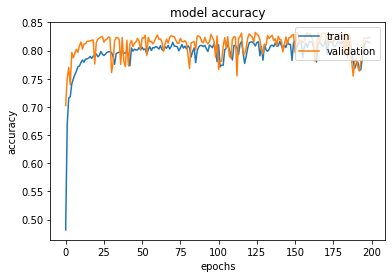

In [62]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc = 'upper right')
plt.show()

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            )